# Práctica 3 - Cuarta prueba

#### Pilar Navarro Ramírez

In [1]:
import pandas as pd

## Preprocesamiento

In [2]:
df_train=pd.read_csv("data/train.csv",na_values=[""])
df_test=pd.read_csv("data/test.csv",na_values=[""])

In [3]:
df_train.columns = [col.lower() for col in df_train]
df_test.columns = [col.lower() for col in df_test]

df_train_orig = df_train.copy()
df_test_orig = df_test.copy()

del df_train["id"]
del df_test["id"]

### Tratamos los datos perdidos

In [4]:
from sklearn import impute

In [5]:
del df_train['descuento']
del df_test['descuento']

In [6]:
df_train_replaced=df_train.copy()
imputer=impute.SimpleImputer(strategy="most_frequent")
values = imputer.fit_transform([df_train_replaced.asientos.values])
df_train_replaced.asientos.update(pd.Series(values[0]))

In [7]:
df_train_replaced=df_train_replaced.dropna()
df_train=df_train.dropna()

Separamos el atributo a predecir del resto de atributos en el conjunto de entrenamiento.

In [8]:
cols = [col for col in df_train.columns if col not in ['precio_cat']]    
df_train, df_train_obj= df_train[cols], df_train['precio_cat']
df_train_replaced, df_train_obj_replaced= df_train_replaced[cols], df_train_replaced['precio_cat']

### 'Transformación' de variables categóricas a numéricas

In [9]:
from sklearn.preprocessing import LabelEncoder

categorical=["nombre","ciudad","combustible","tipo_marchas","mano","consumo","motor_cc","potencia"]

df_train_num=df_train.copy()
df_train_num_rpl=df_train_replaced.copy()
df_test_num=df_test.copy()

for atributo in categorical:
    data=pd.read_csv("data/"+atributo+".csv")
    data.columns = [col.lower() for col in data]
    label = LabelEncoder().fit(data[atributo])
    df_train_num[atributo]=label.transform(df_train[atributo])
    df_train_num_rpl[atributo]=label.transform(df_train_replaced[atributo])
    df_test_num[atributo]=label.transform(df_test[atributo])

### Normalización de los datos

In [10]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

cols = [col for col in df_train_orig.columns if col not in ['precio_cat','id','descuento']]  
categorical=["nombre","ciudad","combustible","tipo_marchas","mano","consumo","motor_cc","potencia"]

df_train_norm=df_train_num.copy()
df_train_norm_rpl=df_train_num_rpl.copy()
df_test_norm=df_test_num.copy()


for atributo in cols:
    data=pd.read_csv("data/"+atributo+".csv")
    data.columns = [col.lower() for col in data]
    if atributo in categorical:
        label = LabelEncoder().fit(data[atributo])
        data[atributo]=label.transform(data[atributo])
    scaler = MinMaxScaler().fit(data.values)
    train_values=df_train_num[atributo].values.reshape(-1,1)
    df_train_norm[atributo]=scaler.transform(train_values)
    train_values_rpl=df_train_num_rpl[atributo].values.reshape(-1,1)
    df_train_norm_rpl[atributo]=scaler.transform(train_values_rpl)
    test_values=df_test_num[atributo].values.reshape(-1,1)
    df_test_norm[atributo]=scaler.transform(test_values)
    

## Aplicación de los algoritmos

In [11]:
import numpy as np

from sklearn.model_selection import cross_val_score

def cross_validation(clf,x,y,mostrar=False):
    scores=cross_val_score(clf,x,y,scoring='accuracy',cv=5)
    accuracy=np.mean(scores)  
    if mostrar:
        print("Accuracy: ", accuracy)
    return accuracy

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,GradientBoostingClassifier

knn=KNeighborsClassifier()
bagging_knn=BaggingClassifier(knn,n_estimators=22, max_samples=1.0, max_features=0.6, random_state=10)
forest=RandomForestClassifier(random_state=10)
extra=ExtraTreesClassifier(random_state=10)
gradient=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=10,max_features='auto',subsample=0.8,max_depth=5)

clfs=[gradient,bagging_knn,forest,extra]

for clf in clfs:
    print("Datos normalizados con todos nulos eliminados: ")
    print(clf)
    cross_validation(clf, df_train_norm, df_train_obj,True)
    print("Datos normalizados con nulos en asientos reemplazados: ")
    print(clf)
    cross_validation(clf,df_train_norm_rpl,df_train_obj_replaced,True)

Datos normalizados con todos nulos eliminados: 
GradientBoostingClassifier(max_depth=5, max_features='auto', random_state=10,
                           subsample=0.8)
Accuracy:  0.8360374531835205
Datos normalizados con nulos en asientos reemplazados: 
GradientBoostingClassifier(max_depth=5, max_features='auto', random_state=10,
                           subsample=0.8)
Accuracy:  0.8328797993111952
Datos normalizados con todos nulos eliminados: 
BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.6,
                  n_estimators=22, random_state=10)
Accuracy:  0.8102943196004995
Datos normalizados con nulos en asientos reemplazados: 
BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.6,
                  n_estimators=22, random_state=10)
Accuracy:  0.8035494098995949
Datos normalizados con todos nulos eliminados: 
RandomForestClassifier(random_state=10)
Accuracy:  0.822791822721598
Datos normalizados con nulos en asientos reemplazados: 
Rando

### Configuración de los parámetros


##### Extra Trees Classiffier

In [20]:
print("Max_samples=0.9")
extra=ExtraTreesClassifier(random_state=10,bootstrap=True, max_samples=0.9)
cross_validation(extra, df_train_norm, df_train_obj,True)
print("Max_samples=0.8")
extra=ExtraTreesClassifier(random_state=10,bootstrap=True, max_samples=0.8)
cross_validation(extra, df_train_norm, df_train_obj,True)
print("Max_samples=0.95")
extra=ExtraTreesClassifier(random_state=10,bootstrap=True, max_samples=0.95)
cross_validation(extra, df_train_norm, df_train_obj,True)
print("Max_samples=0.7")
extra=ExtraTreesClassifier(random_state=10,bootstrap=True, max_samples=0.7)
cross_validation(extra, df_train_norm, df_train_obj,True)
print("Max_samples=0.5")
extra=ExtraTreesClassifier(random_state=10,bootstrap=True, max_samples=0.5)
cross_validation(extra, df_train_norm, df_train_obj,True)
print("Max_samples=0.85")
extra=ExtraTreesClassifier(random_state=10,bootstrap=True, max_samples=0.85)
cross_validation(extra, df_train_norm, df_train_obj,True)

Max_samples=0.9
Accuracy:  0.8117952559300875
Max_samples=0.8
Accuracy:  0.8102946317103621
Max_samples=0.95
Accuracy:  0.810043695380774
Max_samples=0.7
Accuracy:  0.8092961922596753
Max_samples=0.5
Accuracy:  0.8085440074906367
Max_samples=0.85
Accuracy:  0.8097955680399501


0.8097955680399501

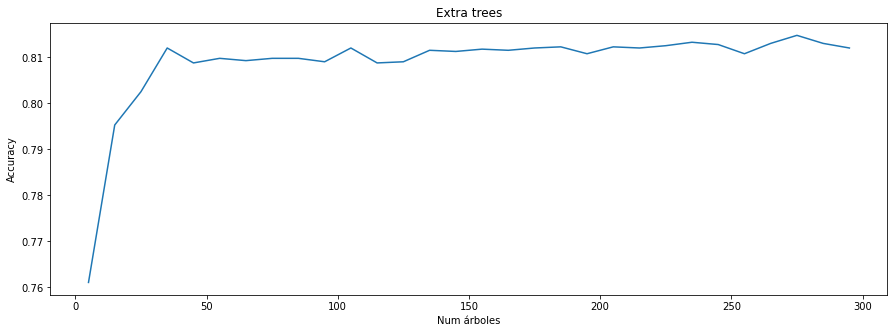

In [22]:
tune_num_arboles(300)

In [26]:
extra=ExtraTreesClassifier(n_estimators=275,random_state=10,bootstrap=True, max_samples=0.9)
cross_validation(extra, df_train_norm, df_train_obj,True)

Accuracy:  0.8147927590511861


0.8147927590511861

In [14]:
from matplotlib import pyplot as plt

def tune_max_depth(max_value):
    acc=[]
    for i in range(2,max_value):
        extra=ExtraTreesClassifier(n_estimators=275,random_state=10,bootstrap=True, max_samples=0.9,max_depth=i)
        acc.append(cross_validation(extra,df_train_norm,df_train_obj))

    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(2,max_value), acc)
    ax.set_title('Extra trees')
    ax.set_xlabel('Max depth')
    ax.set_ylabel('Accuracy')
    plt.show()

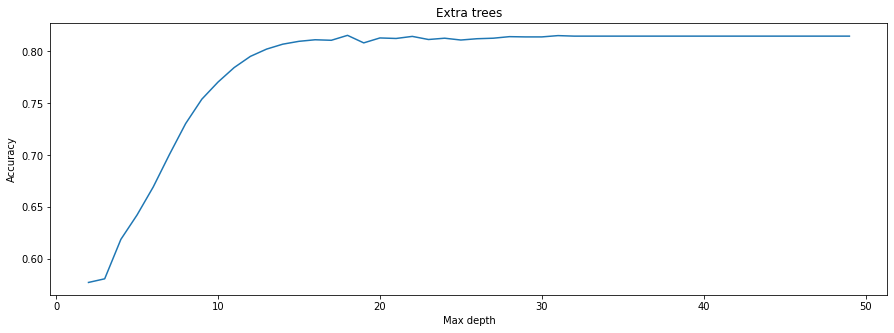

In [15]:
tune_max_depth(50)

In [31]:
extra=ExtraTreesClassifier(n_estimators=275,random_state=10,bootstrap=True, max_samples=0.9,max_depth=40)
cross_validation(extra, df_train_norm, df_train_obj,True)

Accuracy:  0.8147927590511861


0.8147927590511861

In [33]:
from sklearn.model_selection import GridSearchCV

extra=ExtraTreesClassifier(random_state=10)
parameter_space = {
    'bootstrap':[True,False],
    'n_estimators': [275,270,100,70,10],
    'max_samples': [0.9, 0.7,0.8],
}

clf=GridSearchCV(extra, parameter_space, n_jobs=-1, cv=5)
clf.fit(df_train_norm,df_train_obj)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=10), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_samples': [0.9, 0.7, 0.8],
                         'n_estimators': [275, 270, 100, 70, 10]})

In [35]:
print('Mejores parámetros: ', clf.best_params_)

Mejores parámetros:  {'bootstrap': True, 'max_samples': 0.9, 'n_estimators': 275}


### Aplicación al conjunto de test

In [36]:
extra=ExtraTreesClassifier(n_estimators=275,random_state=10,bootstrap=True, max_samples=0.9)
extra.fit(df_train_norm,df_train_obj)
pred=extra.predict(df_test_norm)
ids=df_test_orig["id"]

df_result = pd.DataFrame({'id': ids, 'Precio_cat': pred})
df_result.to_csv("resultados_5.csv", index=False)

In [37]:
df_result.head()

,id,Precio_cat
0,4820,5
1,4821,2
2,4822,2
3,4823,3
4,4824,2
